In [9]:
# Getting Python ready
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import math
import textwrap
#%matplotlib widget

We want to perform an experiment that has a certain number of independent trials (repeats) of tossing a coin. 

We don't toss a real coin, just use a function that comes close to simulating a coin

    aBernoulliExperiment(randomNumGen, bernoulliParam_p=0.5, numRepeatsOfExp = 1, numTrialsInAnExp = 1, profitLoss=[1,0])

The first argument is a random number Generator that enables simulations requiring generation of random outcomes. The rest of the arguments should be self-explanatory. We have the Bernoulli parameter (the probability p of heads/ the event of interest), the number of repeats of an experiment, and the number of trials (number of coin tosses) in an experiment.

Heads is mapped to profitLoss[0] and Tails is mapped to profitLoss[1]. By default the mapping is as that for a Bernoulli RV.

In [10]:
def aBernoulliExperiment(randomNumGen, bernoulliParam_p=0.5, numRepeatsOfExp = 1, numTrialsInAnExp = 1, profitLoss=[1,0]):
    
    repeatIndex = 0
    observation = np.ones([numRepeatsOfExp, numTrialsInAnExp]) * -1
    #print(observation)
    while (repeatIndex < numRepeatsOfExp):
        observation[repeatIndex,:] = randomNumGen.random((1, numTrialsInAnExp))
        #index_ge1 = np.greater_equal(observation[repeatIndex,:], bernoulliParam_p)
        index_ge1 = np.less_equal(observation[repeatIndex,:], bernoulliParam_p)
        
        #print(observation[repeatIndex,:])
        #print(index_ge1)

        observation[repeatIndex,index_ge1] = profitLoss[0]
        observation[repeatIndex, np.invert(index_ge1)] = profitLoss[1]

        #print(observation[repeatIndex,:])

        #print(np.sum(observation[repeatIndex,:])/numTrialsInAnExp)
        repeatIndex = repeatIndex + 1
    return observation

Frequentist performs an experiment that has numTrialsInAnExp=1 independent trials (repeats) of tossing a coin.

Frequentist may repeat the above experiment numRepeatsOfExp times.

The outcome of the first experiment is observation[0][0]

The outcome of the second experiment is observation[1][0]

The outcome of the third experiment is observation[2][0]

... and so on

Note that each experiment's outcome is governed by the same Bernoulli(p) RV. As we increase the number of experiments, the histogram of the outcomes of the experiments begins to look more and more like the PMF of the Bernoulli(p) RV.

PS: We will use numTrialsInAnExp > 1 when we simulate a Binomial RV.


In [78]:
#v_numTrialsInAnExp = 1
v_numRepeatsOfExp = 10000
v_bernoulliParam_p = 0.2
observation = aBernoulliExperiment(np.random.default_rng(1236), bernoulliParam_p=v_bernoulliParam_p, numRepeatsOfExp = v_numRepeatsOfExp, numTrialsInAnExp = 1, profitLoss=[1,0])



The histogram values are: [7941 2059]
The histogram values are: [0.  0.5 1. ]


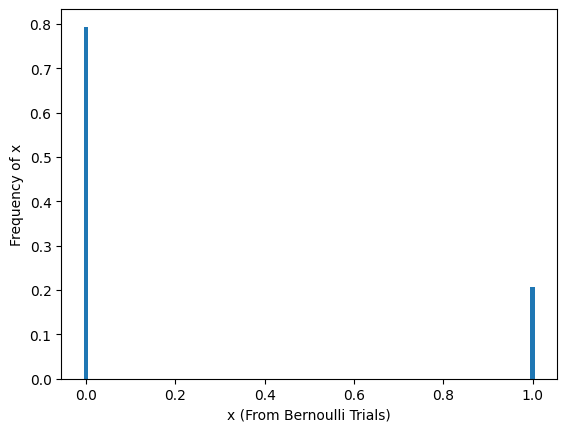

In [81]:
#Prints and plots
# print(("The array of observations (1 row per experiment repeat):", observation))
# print(("Frequency of ones  (1 row per experiment repeat):",np.sum(observation,axis=1)))

fig1, (ax1) = plt.subplots(nrows=1, ncols=1, sharex=True)

histVal = np.histogram(observation, bins=[0,0.5,1],density=False)
#histVal = ax1.hist(observation[0][:], bins=range(0,2), density=False, align='left')

print("The histogram values are:", histVal[0])
print("The histogram values are:", histVal[1])
#print("The histogram values are:", histVal[1][0,2])

ax1.bar([0, 1], histVal[0]/v_numRepeatsOfExp, width = 0.01)

ax1.set_xlabel("x (From Bernoulli Trials)")
ax1.set_ylabel("Frequency of x")
fig1.set_label("No of Trials of Bern Exp is " + str(v_numTrialsInAnExp))

We have four frequentists performing repeat experiments with a coin. Each chooses to repeat the experiment a different number of times. We observe the differences in the histograms (over outcomes) obtained by the frequentists.

In [95]:
frequentists = []

v_bernoulliParam_p = 0.2

numRepeats = [5, 10, 100, 1000]

observationFreqentist1 = aBernoulliExperiment(np.random.default_rng(123768), bernoulliParam_p=v_bernoulliParam_p, numTrialsInAnExp = 1, numRepeatsOfExp=numRepeats[0], profitLoss=[1,0])
observationFreqentist2 = aBernoulliExperiment(np.random.default_rng(123536), bernoulliParam_p=v_bernoulliParam_p, numTrialsInAnExp = 1, numRepeatsOfExp=numRepeats[1], profitLoss=[1,0])
observationFreqentist3 = aBernoulliExperiment(np.random.default_rng(173286), bernoulliParam_p=v_bernoulliParam_p, numTrialsInAnExp = 1, numRepeatsOfExp=numRepeats[2], profitLoss=[1,0])
observationFreqentist4 = aBernoulliExperiment(np.random.default_rng(198396), bernoulliParam_p=v_bernoulliParam_p, numTrialsInAnExp = 1, numRepeatsOfExp=numRepeats[3], profitLoss=[1,0])

frequentists.append(observationFreqentist1)
frequentists.append(observationFreqentist2)
frequentists.append(observationFreqentist3)
frequentists.append(observationFreqentist4)

Frequency
(%) of
Unique x


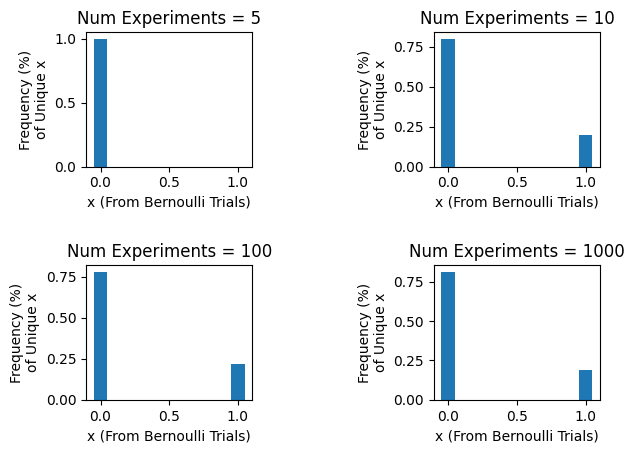

In [100]:
#Prints and plots
# print(("The array of observations (1 row per experiment repeat):", observation))
# print(("Frequency of ones  (1 row per experiment repeat):",np.sum(observation,axis=1)/v_numTrialsInAnExp))
# print("The histogram values are:", histVal)

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False)

# plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

plt.tight_layout(pad = 3.0, w_pad=10.0,h_pad=5.0)

fig.set_label("No of Trials of Bern Exp is " + str(v_numTrialsInAnExp))
obsIdx = 0;
#for rowidx in range(int(np.ceil(v_numRepeats/2))):
for rowidx in range(2):
    for colidx in range(2):
        histVal = np.histogram(frequentists[obsIdx], bins=[0,0.5,1],density=False)
        ax[rowidx][colidx].bar([0, 1], histVal[0]/numRepeats[obsIdx], width = 0.1)
        ax[rowidx][colidx].set_xscale("linear")
        ax[rowidx][colidx].set_xlabel("x (From Bernoulli Trials)")
        ax[rowidx][colidx].set_ylabel(textwrap.fill("Frequency (%) of Unique x", width = 15))
        ax[rowidx][colidx].set_title("Num Experiments = " + str(numRepeats[obsIdx]))
        obsIdx = obsIdx + 1
        # if obsIdx >= v_numRepeats:
        #     rowidx = v_numRepeats
        #     colidx=2
        #     break

# plt.subplot_tool()
# plt.show(block=True)


print(textwrap.fill("Frequency (%) of Unique x", width = 10))